### <기초 라이브러리>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### <데이터 로드>

#### 고객데이터

- 고객과 관련된 정보 / 1468개 행
- 고객ID : 고객 고유 ID
- 성별 : 고객 성별 / 남(36%), 여(64%)
- 고객지역 : 고객지역 / 캘리포니아(31%), 시카고(31%), 뉴저지(10%), 뉴욕(22%), 워싱턴DC(5%)
- 가입기간 : 가입기간 (단위 : 월) / 2~50, 평균: 25.9

In [ ]:
df_customer = pd.read_csv('./Customer_info.csv')

In [ ]:
df_customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [ ]:
df_customer.groupby('성별').size()

성별
남    534
여    934
dtype: int64

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [ ]:
df_customer['고객지역'].unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

In [ ]:
df_customer.groupby('고객지역').size()

고객지역
California       464
Chicago          456
New Jersey       149
New York         324
Washington DC     75
dtype: int64

In [ ]:
df_customer['가입기간'].unique()

array([12, 43, 33, 30, 49, 32, 46, 24, 40, 10, 19, 14, 25, 50, 39, 21, 29,
       26, 41, 28, 15, 18, 31, 27, 34, 44, 45, 36, 42,  8,  7, 48,  5, 47,
        2, 35,  6, 16, 11, 23,  4, 13, 38, 22,  9, 37,  3, 17, 20],
      dtype=int64)

In [ ]:
sorted(df_customer['가입기간'].unique(), reverse = False)

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [ ]:
df_customer['가입기간'].mean()

25.912125340599456

#### 할인 데이터

- 할인과 관련된 정보 / 204개
- 월 : 월(Month) 정보 / 1~12월
- 제품카테고리 : 제품이 포함된 카테고리 / 17종류
- 쿠폰코드 : 쿠폰코드 / 48종류 (각 카테고리마다 쿠폰코드가 같음. 단, Drinkware와 Lifestyle은 Extra 코드를 공유)
- 할인율 : 해당 쿠폰에 대한 할인율(%) / 10, 20, 30

In [ ]:
df_discount = pd.read_csv('./Discount_info.csv')

In [ ]:
df_discount.head()

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
df_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
df_discount['제품카테고리'].unique()

array(['Apparel', 'Nest-USA', 'Office', 'Drinkware', 'Lifestyle', 'Bags',
       'Notebooks', 'Headgear', 'Nest', 'Waze', 'Bottles', 'Nest-Canada',
       'Housewares', 'Accessories', 'Gift Cards', 'Notebooks & Journals',
       'Android'], dtype=object)

In [ ]:
len(df_discount['제품카테고리'].unique())

17

In [ ]:
df_discount['쿠폰코드'].unique()

array(['SALE10', 'SALE20', 'SALE30', 'ELEC10', 'ELEC20', 'ELEC30',
       'OFF10', 'OFF20', 'OFF30', 'EXTRA10', 'EXTRA20', 'EXTRA30',
       'AIO10', 'AIO20', 'AIO30', 'NOTES10', 'NOTES20', 'NOTES30',
       'HGEAR10', 'HGEAR20', 'HGEAR30', 'NE10', 'NE20', 'NE30', 'WEMP10',
       'WEMP20', 'WEMP30', 'BT10', 'BT20', 'BT30', 'NCA10', 'NCA20',
       'NCA30', 'HOU10', 'HOU20', 'HOU30', 'ACC10', 'ACC20', 'ACC30',
       'GC10', 'GC20', 'GC30', 'NJ10', 'NJ20', 'NJ30', 'AND10', 'AND20',
       'AND30'], dtype=object)

In [ ]:
len(df_discount['쿠폰코드'].unique())

48

#### 마케팅 데이터

- 마케팅비용과 관련된 정보 / 총 365개 행
- 날짜 : 마케팅이 이루어진 날짜
- 오프라인비용 : 오프라인 마케팅으로 지출한 비용 (단위 : 달러) / 500, 700, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000 (총 11종류)
- 온라인비용 : 온라인 마케팅으로 지출한 비용 (단위 : 달러) / 각 날마다 다름 (총 365종류)

In [ ]:
df_marketing = pd.read_csv('./Marketing_info.csv')

In [ ]:
df_marketing.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [ ]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [ ]:
sorted(df_marketing['오프라인비용'].unique(), reverse = False)

[500, 700, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

In [ ]:
len(df_marketing['온라인비용'].unique())

365

#### 온라인세일 데이터

- 온라인거래와 관련된 정보 / 52924개 행
- 고객ID : 고객 고유 ID / 1468개 (고객 데이터 모두 존재)
- 거래ID : 거래 고유 ID / 최소 1번, 최대 695번
- 거래날짜 : 거래가 이루어진 날짜
- 제품ID : 제품 고유 ID / 1145개
- 제품카테고리 : 제품이 포함된 카테고리 / 20개 ('Backpacks', 'Fun', 'Google', 'More Bags' 추가)
- 수량 : 주문한 품목 수 / 1~ 900개
- 평균금액 : 수량 1개당 가격 (단위 : 달러) / 0.39 ~ 355.74 / 동일 상품이어도 세부 옵션에 따라 가격이 다를 수 있음
- 배송료 : 배송비용 (단위 : 달러) / 0 ~ 521.36
- 쿠폰상태 : 할인쿠폰 적용 상태 / 'Used'(50%), 'Not Used'(15%), 'Clicked'(34%)

In [ ]:
df_online = pd.read_csv('./Onlinesales_info.csv')

In [ ]:
df_online.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [ ]:
len(df_online['고객ID'].unique())

1468

In [ ]:
df_online.groupby('고객ID')['거래ID'].count().agg(['min', 'max'])

min      1
max    695
Name: 거래ID, dtype: int64

In [ ]:
len(df_online['제품ID'].unique())

1145

In [ ]:
df_online['제품카테고리'].unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Notebooks & Journals', 'Headgear', 'Waze', 'Fun', 'Nest-Canada',
       'Backpacks', 'Google', 'Bottles', 'Gift Cards', 'More Bags',
       'Housewares', 'Android', 'Accessories', 'Nest'], dtype=object)

In [ ]:
len(df_online['제품카테고리'].unique())

20

In [ ]:
set(df_online['제품카테고리'].unique().tolist()) - set(df_discount['제품카테고리'].unique().tolist())

{'Backpacks', 'Fun', 'Google', 'More Bags'}

In [ ]:
max(df_online['수량'])

900

In [ ]:
min(df_online['수량'])

1

In [ ]:
min(df_online['평균금액']), max(df_online['평균금액'])

(0.39, 355.74)

In [ ]:
min(df_online['배송료']), max(df_online['배송료'])

(0.0, 521.36)

In [ ]:
df_online['쿠폰상태'].unique()

array(['Used', 'Not Used', 'Clicked'], dtype=object)

In [ ]:
df_online.groupby('쿠폰상태').size() / len(df_online)

쿠폰상태
Clicked     0.508767
Not Used    0.152936
Used        0.338296
dtype: float64

#### 세금 데이터

- 세금과 관련된 정보 / 총 20개 행
- 제품 카테고리 : 제품이 포함된 카테고리 / 20개
- GST : Goods and Services Tax(%) / 0.1, 0.05, 0.12, 0.18 (총 4종류)

In [ ]:
df_tax = pd.read_csv('./Tax_info.csv')

In [ ]:
df_tax.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [ ]:
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [ ]:
len(df_tax['제품카테고리'].unique())

20

In [ ]:
df_tax['GST'].unique()

array([0.1 , 0.18, 0.05, 0.12])

### <데이터 연결>

In [ ]:
df_customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [ ]:
df_online.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
df_marketing.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [ ]:
df_discount.head()

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
df_tax.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


--------------

#### 고객데이터 + 온라인세일

In [ ]:
df_customer_sale = pd.merge(df_customer, df_online, on='고객ID', how='outer')
df_customer_sale.head()

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


#### 총금액 추가

In [ ]:
df_customer_sale['총금액'] = df_customer_sale['수량'] * df_customer_sale['평균금액']
df_customer_sale.head()

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,16.50


#### 월 추가

In [ ]:
df_customer_sale['거래날짜'] = pd.to_datetime(df_customer_sale['거래날짜'])
df_customer_sale['월'] = df_customer_sale['거래날짜'].dt.strftime('%b')
df_customer_sale.head()

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액,월
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05,Jan
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65,Jan
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,16.50,Jan


#### 고객데이터 + 온라인세일 + 할인율

In [ ]:
df_customer_sale_discount = pd.merge(df_customer_sale, df_discount, on=['월','제품카테고리'], how='left')
df_customer_sale_discount.head()

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액,월,쿠폰코드,할인율
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05,Jan,OFF10,10.0
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65,Jan,SALE10,10.0
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,16.50,Jan,AIO10,10.0


#### 고객데이터 + 온라인세일 + 할일율 + 세금

In [ ]:
df_customer_sale_discount_tax = pd.merge(df_customer_sale_discount, df_tax, on='제품카테고리', how='left')
df_customer_sale_discount_tax.head()

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액,월,쿠폰코드,할인율,GST
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0,0.10
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0,0.10
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05,Jan,OFF10,10.0,0.10
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65,Jan,SALE10,10.0,0.18
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,16.50,Jan,AIO10,10.0,0.18


#### 해당 데이터 확인하기

In [ ]:
df = df_customer_sale_discount_tax

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객ID    52924 non-null  object        
 1   성별      52924 non-null  object        
 2   고객지역    52924 non-null  object        
 3   가입기간    52924 non-null  int64         
 4   거래ID    52924 non-null  object        
 5   거래날짜    52924 non-null  datetime64[ns]
 6   제품ID    52924 non-null  object        
 7   제품카테고리  52924 non-null  object        
 8   수량      52924 non-null  int64         
 9   평균금액    52924 non-null  float64       
 10  배송료     52924 non-null  float64       
 11  쿠폰상태    52924 non-null  object        
 12  총금액     52924 non-null  float64       
 13  월       52924 non-null  object        
 14  쿠폰코드    52524 non-null  object        
 15  할인율     52524 non-null  float64       
 16  GST     52924 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object

In [ ]:
df.isnull().sum()

고객ID        0
성별          0
고객지역        0
가입기간        0
거래ID        0
거래날짜        0
제품ID        0
제품카테고리      0
수량          0
평균금액        0
배송료         0
쿠폰상태        0
총금액         0
월           0
쿠폰코드      400
할인율       400
GST         0
dtype: int64

In [ ]:
null_coupon_rows = df[df['쿠폰코드'].isnull()]
null_discount_rows = df[df['할인율'].isnull()]

In [ ]:
if null_coupon_rows.equals(null_discount_rows):
    print("쿠폰코드와 할인율이 모두 null인 행의 내용이 같습니다.")
else:
    print("쿠폰코드와 할인율이 모두 null인 행의 내용이 다릅니다.")

쿠폰코드와 할인율이 모두 null인 행의 내용이 같습니다.


In [ ]:
null_coupon_rows.head()

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액,월,쿠폰코드,할인율,GST
24,USER_1358,남,Chicago,12,Transaction_0020,2019-01-01,Product_1138,Fun,4,9.27,6.50,Used,37.08,Jan,NaN,NaN,0.18
104,USER_1358,남,Chicago,12,Transaction_1051,2019-01-17,Product_0886,Google,1,11.54,6.50,Clicked,11.54,Jan,NaN,NaN,0.10
118,USER_1358,남,Chicago,12,Transaction_1089,2019-01-17,Product_0196,Fun,2,7.42,6.50,Clicked,14.84,Jan,NaN,NaN,0.18
144,USER_1358,남,Chicago,12,Transaction_1109,2019-01-17,Product_0863,Backpacks,1,82.52,13.78,Not Used,82.52,Jan,NaN,NaN,0.10
434,USER_0585,여,New York,46,Transaction_0046,2019-01-02,Product_0863,Backpacks,1,103.15,6.50,Clicked,103.15,Jan,NaN,NaN,0.10


In [ ]:
df[df['쿠폰상태'] == 'Not Used'].head()

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액,월,쿠폰코드,할인율,GST
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65,Jan,SALE10,10.0,0.18
6,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0880,Drinkware,15,3.08,6.5,Not Used,46.20,Jan,EXTRA10,10.0,0.18
10,USER_1358,남,Chicago,12,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.5,Not Used,245.54,Jan,ELEC10,10.0,0.10
17,USER_1358,남,Chicago,12,Transaction_0019,2019-01-01,Product_0984,Nest-USA,2,81.50,6.5,Not Used,163.00,Jan,ELEC10,10.0,0.10
33,USER_1358,남,Chicago,12,Transaction_0028,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Not Used,153.71,Jan,ELEC10,10.0,0.10


In [ ]:
null_coupon_rows['제품카테고리'].unique()

array(['Fun', 'Google', 'Backpacks', 'More Bags'], dtype=object)

- 해당 카테고리는 할인데이터에 없던 카테고리
- 따라서 해당하는 상품들은 쿠폰코드는 unknown으로 바꾸고, 할인율도 0으로 변경, 쿠폰 상태도 Not Used로 변경


In [ ]:
# 쿠폰코드가 null값인 행의 쿠폰상태를 "unknown"으로 변경
df.loc[df['쿠폰코드'].isnull(), '쿠폰코드'] = 'unknown'

# 할인율이 null값인 행의 할인율을 0으로 변경
df.loc[df['할인율'].isnull(), '할인율'] = 0

# 쿠폰상태가 "not used"인 행의 쿠폰상태를 "Not Used"으로 변경
df.loc[df['쿠폰상태'] == 'not used', '쿠폰상태'] = 'Not Used'

In [ ]:
df.isnull().sum()

고객ID      0
성별        0
고객지역      0
가입기간      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
총금액       0
월         0
쿠폰코드      0
할인율       0
GST       0
dtype: int64

#### 최종결제금액 추가하기

In [ ]:
df['최종결제금액'] = df.apply(lambda row: row['총금액'] * (1 - row['할인율'] / 100) + row['배송료']
                              if row['쿠폰상태'] == 'Used' else row['총금액'] + row['배송료'], axis=1)
df.head()

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액,월,쿠폰코드,할인율,GST,최종결제금액
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0,0.10,144.839
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0,0.10,144.839
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05,Jan,OFF10,10.0,0.10,8.345
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65,Jan,SALE10,10.0,0.18,94.150
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,16.50,Jan,AIO10,10.0,0.18,21.350


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객ID    52924 non-null  object        
 1   성별      52924 non-null  object        
 2   고객지역    52924 non-null  object        
 3   가입기간    52924 non-null  int64         
 4   거래ID    52924 non-null  object        
 5   거래날짜    52924 non-null  datetime64[ns]
 6   제품ID    52924 non-null  object        
 7   제품카테고리  52924 non-null  object        
 8   수량      52924 non-null  int64         
 9   평균금액    52924 non-null  float64       
 10  배송료     52924 non-null  float64       
 11  쿠폰상태    52924 non-null  object        
 12  총금액     52924 non-null  float64       
 13  월       52924 non-null  object        
 14  쿠폰코드    52924 non-null  object        
 15  할인율     52924 non-null  float64       
 16  GST     52924 non-null  float64       
 17  최종결제금액  52924 non-null  float64       
dtypes: dat

In [ ]:
# 1. 제품카테고리별로 groupby하여 결제금액의 합을 구하고 비율을 계산하여 '결제금액 비율' 컬럼을 만듭니다.
category_payment = df.groupby('제품카테고리')['평균금액'].sum()
total_payment = df['평균금액'].sum()
category_payment_ratio = (category_payment / total_payment * 100).round(2)

# 2. 제품카테고리별로 '평균금액'의 평균을 계산하여 '평균 금액' 컬럼을 만듭니다.
average_price = df.groupby('제품카테고리')['평균금액'].mean().round(2)

# 3. 제품카테고리별로 개수를 세어 '주문횟수' 컬럼을 만듭니다.
count_per_category = df['제품카테고리'].value_counts()

# 데이터프레임으로 변환하여 테이블을 만듭니다.
result_df = pd.DataFrame({
    '결제금액 비율': category_payment_ratio,
    '평균 금액': average_price,
    '주문횟수': count_per_category
})

result_df

,결제금액 비율,평균 금액,주문횟수
Accessories,0.07,8.21,234
Android,0.02,15.90,43
Apparel,12.97,19.79,18126
Backpacks,0.26,80.05,89
Bags,2.03,29.83,1882
Bottles,0.03,3.44,268
Drinkware,1.35,10.70,3483
Fun,0.04,6.74,160
Gift Cards,0.64,111.36,159
Google,0.06,16.45,105


In [ ]:
result_df['주문횟수'].sum()

52924

In [ ]:
result_df['평균 금액'].mean()

42.099000000000004

In [ ]:
mean_price = result_df['평균 금액'].mean()
result_df = result_df[result_df['평균 금액'] > mean_price]

result_df

,결제금액 비율,평균 금액,주문횟수
Backpacks,0.26,80.05,89
Gift Cards,0.64,111.36,159
Nest,15.44,194.22,2198
Nest-Canada,1.80,157.24,317
Nest-USA,63.02,124.33,14013


In [ ]:
result_df['결제금액 비율'].sum()

81.16

------

### <파레토 법칙 확인하기>

#### 상위 20% 고객

In [ ]:
# 고객별 최종결제금액 합 구하기
total_pay_by_customer = df.groupby('고객ID')['최종결제금액'].sum()

# 상위 20% 고객 선택
top_20_percent_customers = total_pay_by_customer.nlargest(int(len(total_pay_by_customer) * 0.2))

# 상위 20% 고객들의 최종결제금액 총 합
top_20_percent_total_pay = top_20_percent_customers.sum()

# 전체 고객들의 최종결제금액 총 합
total_pay_all_customers = total_pay_by_customer.sum()

# 상위 20%의 최종결제금액 총 합이 전체 고객들의 최종결제금액 총 합에서 차지하는 비율 계산
percentage_top_20 = (top_20_percent_total_pay / total_pay_all_customers) * 100

# 결과 출력
print("상위 20%의 최종결제금액 총 합이 전체 고객들의 최종결제금액 총 합에서 차지하는 비율:", round(percentage_top_20, 2), "%")

상위 20%의 최종결제금액 총 합이 전체 고객들의 최종결제금액 총 합에서 차지하는 비율: 60.66 %


#### 누적 상위 고객 대비 누적 최종결제금액 그래프

In [ ]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

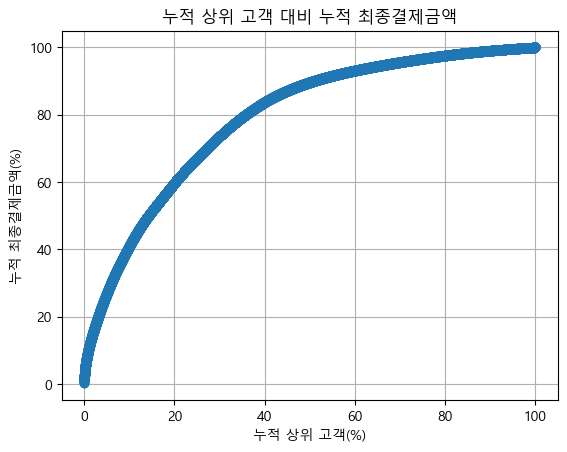

In [ ]:
# 고객별 최종결제금액을 내림차순으로 정렬
sorted_df = df.sort_values(by='최종결제금액', ascending=False)

# 전체 최종결제금액 구하기
total_payment = sorted_df['최종결제금액'].sum()

# 누적 상위 고객과 누적 최종결제금액 계산
sorted_df['누적 상위 고객'] = (np.arange(len(sorted_df)) + 1) / len(sorted_df) * 100
sorted_df['누적 최종결제금액(%)'] = (sorted_df['최종결제금액'].cumsum() / total_payment) * 100

# 그래프 그리기
plt.plot(sorted_df['누적 상위 고객'], sorted_df['누적 최종결제금액(%)'], marker='o')
plt.xlabel('누적 상위 고객(%)')
plt.ylabel('누적 최종결제금액(%)')
plt.title('누적 상위 고객 대비 누적 최종결제금액')
plt.grid(True)
plt.show()

----

### Monetary에 대한 분석

#### 전체 카테고리

In [ ]:
# 각 고객ID별 최종결제금액의 합 구하기
customer_total_amount = df.groupby('고객ID')['최종결제금액'].sum().reset_index()

# 최종결제금액에 따라 등급 부여
total_amount_sum = customer_total_amount['최종결제금액'].sum()
top_20_threshold = customer_total_amount['최종결제금액'].quantile(0.8)
grade_4_threshold = top_20_threshold
grade_5_threshold = customer_total_amount[customer_total_amount['최종결제금액'] > top_20_threshold]['최종결제금액'].mean()
grade_3_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_4_threshold]['최종결제금액'].mean()
grade_2_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_3_threshold]['최종결제금액'].mean()

# 등급 부여 함수 정의
def assign_grade(amount):
    if amount > grade_5_threshold:
        return 5
    elif amount > grade_4_threshold:
        return 4
    elif amount > grade_3_threshold:
        return 3
    elif amount > grade_2_threshold:
        return 2
    else:
        return 1

# 각 고객ID별 등급 부여
customer_total_amount['등급'] = customer_total_amount['최종결제금액'].apply(assign_grade)

# 등급별 통계 계산
grades_stats = customer_total_amount.groupby('등급').agg({
    '최종결제금액': ['mean', lambda x: (x.count() / len(customer_total_amount)) * 100, lambda x: (x.sum() / total_amount_sum) * 100]
}).reset_index()
grades_stats.columns = ['등급', '평균결제금액', '고객비율', '결제금액비율']

print("등급별 통계:")
grades_stats

등급별 통계:


,등급,평균결제금액,고객비율,결제금액비율
0,1,292.683661,24.318801,2.125185
1,2,1115.591123,21.594005,7.192740
2,3,2942.416404,34.059946,29.922936
3,4,6947.314359,14.032698,29.108126
4,5,17683.770670,5.994550,31.651013


등급간 평균결제금액의 차이
- 4등급 -> 5등급 : 2.54배
- 3등급 -> 4등급 : 2.36배
- 2등급 -> 3등급 : 2.63배
- 1등급 -> 2등급 : 3.81배

#### 평균 단가가 높은 카테고리('Backpacks', 'Gift Cards', 'Nest', 'Nest-Canada', 'Nest-USA')

In [ ]:
# 필터링할 제품 카테고리 리스트
categories_to_include = ['Backpacks', 'Gift Cards', 'Nest', 'Nest-Canada', 'Nest-USA']

# '제품카테고리'가 필터링할 카테고리 리스트에 속하는 행들을 선택하여 새로운 DataFrame 생성
df_high = df[df['제품카테고리'].isin(categories_to_include)]

# 각 고객ID별 최종결제금액의 합 구하기
customer_total_amount = df_high.groupby('고객ID')['최종결제금액'].sum().reset_index()

# 최종결제금액에 따라 등급 부여
total_amount_sum = customer_total_amount['최종결제금액'].sum()
top_20_threshold = customer_total_amount['최종결제금액'].quantile(0.8)
grade_4_threshold = top_20_threshold
grade_5_threshold = customer_total_amount[customer_total_amount['최종결제금액'] > top_20_threshold]['최종결제금액'].mean()
grade_3_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_4_threshold]['최종결제금액'].mean()
grade_2_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_3_threshold]['최종결제금액'].mean()

# 등급 부여 함수 정의
def assign_grade(amount):
    if amount > grade_5_threshold:
        return 5
    elif amount > grade_4_threshold:
        return 4
    elif amount > grade_3_threshold:
        return 3
    elif amount > grade_2_threshold:
        return 2
    else:
        return 1

# 각 고객ID별 등급 부여
customer_total_amount['등급'] = customer_total_amount['최종결제금액'].apply(assign_grade)

# 등급별 통계 계산
grades_stats = customer_total_amount.groupby('등급').agg({
    '최종결제금액': ['mean', lambda x: (x.count() / len(customer_total_amount)) * 100, lambda x: (x.sum() / total_amount_sum) * 100]
}).reset_index()
grades_stats.columns = ['등급', '평균결제금액', '고객비율', '결제금액비율']

print("등급별 통계:")
grades_stats

등급별 통계:


,등급,평균결제금액,고객비율,결제금액비율
0,1,321.108636,24.414977,3.265395
1,2,911.363650,21.840874,8.290660
2,3,2227.379095,33.697348,31.262037
3,4,4837.753744,13.416537,27.034080
4,5,10916.859624,6.630265,30.147828


등급간 평균결제금액의 차이
- 4등급 -> 5등급 : 2.25배
- 3등급 -> 4등급 : 2.17배
- 2등급 -> 3등급 : 2.44배
- 1등급 -> 2등급 : 2.83배

#### 평균 단가가 낮은 카테고리('Backpacks', 'Gift Cards', 'Nest', 'Nest-Canada', 'Nest-USA' 제외)

In [ ]:
# 필터링할 제품 카테고리 리스트
categories_to_exclude = ['Backpacks', 'Gift Cards', 'Nest', 'Nest-Canada', 'Nest-USA']

# '제품카테고리'가 필터링할 카테고리 리스트에 속하지 않는 행들을 선택하여 새로운 DataFrame 생성
df_low = df[~df['제품카테고리'].isin(categories_to_exclude)]

# 각 고객ID별 최종결제금액의 합 구하기
customer_total_amount = df_low.groupby('고객ID')['최종결제금액'].sum().reset_index()

# 최종결제금액에 따라 등급 부여
total_amount_sum = customer_total_amount['최종결제금액'].sum()
top_20_threshold = customer_total_amount['최종결제금액'].quantile(0.8)
grade_4_threshold = top_20_threshold
grade_5_threshold = customer_total_amount[customer_total_amount['최종결제금액'] > top_20_threshold]['최종결제금액'].mean()
grade_3_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_4_threshold]['최종결제금액'].mean()
grade_2_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_3_threshold]['최종결제금액'].mean()

# 등급 부여 함수 정의
def assign_grade(amount):
    if amount > grade_5_threshold:
        return 5
    elif amount > grade_4_threshold:
        return 4
    elif amount > grade_3_threshold:
        return 3
    elif amount > grade_2_threshold:
        return 2
    else:
        return 1

# 각 고객ID별 등급 부여
customer_total_amount['등급'] = customer_total_amount['최종결제금액'].apply(assign_grade)

# 등급별 통계 계산
grades_stats = customer_total_amount.groupby('등급').agg({
    '최종결제금액': ['mean', lambda x: (x.count() / len(customer_total_amount)) * 100, lambda x: (x.sum() / total_amount_sum) * 100]
}).reset_index()
grades_stats.columns = ['등급', '평균결제금액', '고객비율', '결제금액비율']

print("등급별 통계:")
grades_stats

등급별 통계:


,등급,평균결제금액,고객비율,결제금액비율
0,1,96.107769,26.330532,1.965315
1,2,350.293526,21.848739,5.943914
2,3,1002.348300,31.792717,24.749153
3,4,2661.819465,15.056022,31.124536
4,5,9379.274817,4.971989,36.217081


등급간 평균결제금액의 차이
- 4등급 -> 5등급 : 3.52배
- 3등급 -> 4등급 : 2.65배
- 2등급 -> 3등급 : 2.86배
- 1등급 -> 2등급 : 3.64배

----

### <RFM 분석(모든카테고리)>

In [ ]:
rfm = df.copy()

In [ ]:
recency_data = rfm.groupby('고객ID')['거래날짜'].max().reset_index()
recency_data.head()

,고객ID,거래날짜
0,USER_0000,2019-09-15
1,USER_0001,2019-11-02
2,USER_0002,2019-10-19
3,USER_0003,2019-12-14
4,USER_0004,2019-09-15


In [ ]:
recency_data = rfm['거래날짜'].max()

In [ ]:
# Recency(최근성) 계산
recency_df = rfm.groupby('고객ID')['거래날짜'].max().reset_index()
recency_df['Recency'] = (recency_data - recency_df['거래날짜']).dt.days
recency_df

,고객ID,거래날짜,Recency
0,USER_0000,2019-09-15,107
1,USER_0001,2019-11-02,59
2,USER_0002,2019-10-19,73
3,USER_0003,2019-12-14,17
4,USER_0004,2019-09-15,107
...,...,...,...
1463,USER_1463,2019-04-05,270
1464,USER_1464,2019-10-05,87
1465,USER_1465,2019-06-20,194
1466,USER_1466,2019-10-23,69


In [ ]:
# Frequency(구매 빈도) 계산
frequency_df = rfm.groupby('고객ID')['거래ID'].count().reset_index()
frequency_df.rename(columns={'거래ID': 'Frequency'}, inplace=True)
frequency_df

,고객ID,Frequency
0,USER_0000,2
1,USER_0001,60
2,USER_0002,23
3,USER_0003,17
4,USER_0004,36
...,...,...
1463,USER_1463,7
1464,USER_1464,40
1465,USER_1465,8
1466,USER_1466,1


In [ ]:
# Monetary(구매 금액) 계산
monetary_df = rfm.groupby('고객ID')['최종결제금액'].sum().reset_index()
monetary_df.rename(columns={'최종결제금액': 'Monetary'}, inplace=True)
monetary_df

,고객ID,Monetary
0,USER_0000,171.693
1,USER_0001,13718.492
2,USER_0002,1508.565
3,USER_0003,1335.733
4,USER_0004,1873.212
...,...,...
1463,USER_1463,811.480
1464,USER_1464,2765.158
1465,USER_1465,149.497
1466,USER_1466,304.000


In [ ]:
RFM_Table = recency_df.merge(frequency_df, on='고객ID').merge(monetary_df, on='고객ID')
del RFM_Table['거래날짜']
RFM_Table.head()

,고객ID,Recency,Frequency,Monetary
0,USER_0000,107,2,171.693
1,USER_0001,59,60,13718.492
2,USER_0002,73,23,1508.565
3,USER_0003,17,17,1335.733
4,USER_0004,107,36,1873.212


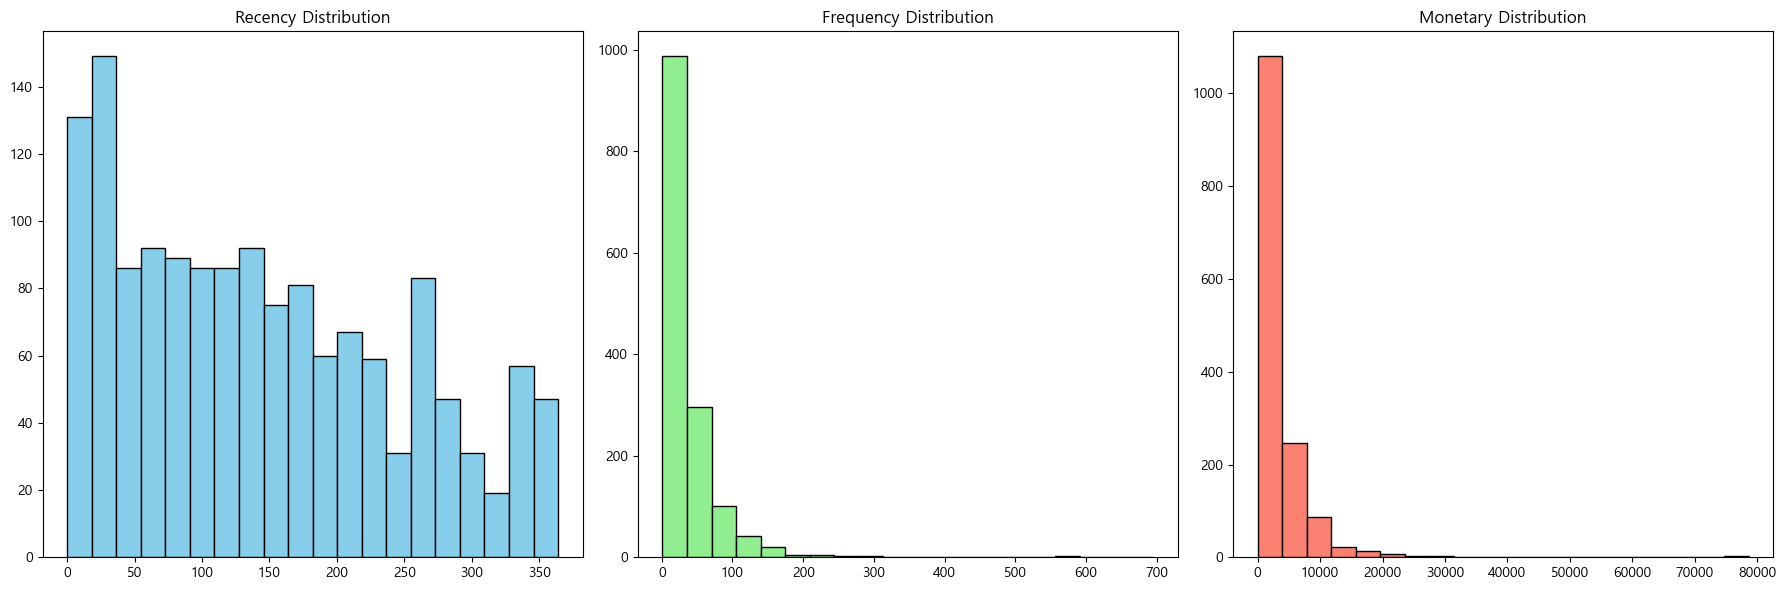

In [ ]:
# RFM 데이터 시각화
plt.figure(figsize=(18, 6))

# Recency 분포 시각화
plt.subplot(1, 3, 1)
plt.hist(RFM_Table['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
plt.hist(RFM_Table['Frequency'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
plt.hist(RFM_Table['Monetary'], bins=20, color='salmon', edgecolor='black')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

-----

### <RFM 계산>

In [ ]:
df2 = RFM_Table.copy()

In [ ]:
df2

,고객ID,Recency,Frequency,Monetary
0,USER_0000,107,2,171.693
1,USER_0001,59,60,13718.492
2,USER_0002,73,23,1508.565
3,USER_0003,17,17,1335.733
4,USER_0004,107,36,1873.212
...,...,...,...,...
1463,USER_1463,270,7,811.480
1464,USER_1464,87,40,2765.158
1465,USER_1465,194,8,149.497
1466,USER_1466,69,1,304.000


#### Recency 기준
- 365일 기준으로 사분위수로 계산

In [ ]:
def recency(r):
    if r <= 365 * 0.2:
        return 5
    elif r <= 365 * 0.4:
        return 4
    elif r <= 365 * 0.6:
        return 3
    elif r <= 365 * 0.8:
        return 2
    else:
        return 1

# 개별 값에 대해 반복하기 때문에 map 함수
df2['R'] = df2['Recency'].map(lambda x: recency(x))
df2[['Recency', 'R']].head(3)

,Recency,R
0,107,4
1,59,5
2,73,5


#### Frequency 기준
- 빈도가 1이면 1등급
- 남은 등급에 대해 평균보다 작은 값에 등급 부여
- 반복

In [ ]:
def frequency(f):
    # 원본을 건드리지 않기 위해 새로 만듦
    s = pd.Series([0 for _ in range(len(f))])

    # 빈도가 1이면 1등급을 준다
    s[f == 1] = 1
    state = 2
    while state <= 4:
        # 아직 등급이 부여되지 않은 값들에 대해(값이 0), 평균보다 작은 값에 등급을 부여한다
        mean_value = f[s == 0].mean()  # 현재 등급이 부여되지 않은 값들의 평균 빈도 계산
        s[(s == 0) & (f < mean_value)] = state
        state += 1

    # 남은 것들은 5등급을 준다
    s[s==0] = 5

    # 등급별 기준 빈도를 출력
    print("1등급 기준 빈도:", f[f == 1].mean())
    print("2등급 기준 빈도:", f[s == 2].mean())
    print("3등급 기준 빈도:", f[s == 3].mean())
    print("4등급 기준 빈도:", f[s == 4].mean())

    return s

# 전체 값에 대해 접근하기 때문에 Series 전체를 함수에 넘김
df2['F'] = frequency(df2['Frequency'])
df2[['Frequency', 'F']].head(3)

1등급 기준 빈도: 1.0
2등급 기준 빈도: 15.820594479830149
3등급 기준 빈도: 55.126543209876544
4등급 기준 빈도: 108.86274509803921


,Frequency,F
0,2,2
1,60,3
2,23,2


#### Monetary 기준
- 상위 20%에게 4등급 부여
- 4등급의 최종결제금액 평균보다 높은 고객들에게 5등급 부여
- 하위 80% 고객들의 최종결제금액 평균보다 높은 고객들에게 3등급 부여
- 5,4,3등급을 제외한 고객들의 최종결제금액 평균보다 높은 고객들에게 2등급 부여
- 나머지에게 1등급 부여

In [ ]:
# 각 고객ID별 최종결제금액의 합 구하기
customer_total_amount = df.groupby('고객ID')['최종결제금액'].sum().reset_index()

# 최종결제금액에 따라 등급 부여
total_amount_sum = customer_total_amount['최종결제금액'].sum()
top_20_threshold = customer_total_amount['최종결제금액'].quantile(0.8)
grade_4_threshold = top_20_threshold
grade_5_threshold = customer_total_amount[customer_total_amount['최종결제금액'] > top_20_threshold]['최종결제금액'].mean()
grade_3_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_4_threshold]['최종결제금액'].mean()
grade_2_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_3_threshold]['최종결제금액'].mean()

# 등급 부여 함수 정의
def assign_grade(amount):
    if amount > grade_5_threshold:
        return 5
    elif amount > grade_4_threshold:
        return 4
    elif amount > grade_3_threshold:
        return 3
    elif amount > grade_2_threshold:
        return 2
    else:
        return 1

# 각 고객ID별 등급 부여
df2['M'] = df2['Monetary'].apply(assign_grade)
df2

,고객ID,Recency,Frequency,Monetary,R,F,M
0,USER_0000,107,2,171.693,4,2,1
1,USER_0001,59,60,13718.492,5,3,5
2,USER_0002,73,23,1508.565,5,2,2
3,USER_0003,17,17,1335.733,5,2,2
4,USER_0004,107,36,1873.212,4,2,3
...,...,...,...,...,...,...,...
1463,USER_1463,270,7,811.480,2,2,2
1464,USER_1464,87,40,2765.158,4,3,3
1465,USER_1465,194,8,149.497,3,2,1
1466,USER_1466,69,1,304.000,5,1,1


In [ ]:
df2['Cell'] = df2['R'].map(str) + df2['F'].map(str) + df2['M'].map(str)
df2.head()

,고객ID,Recency,Frequency,Monetary,R,F,M,Cell
0,USER_0000,107,2,171.693,4,2,1,421
1,USER_0001,59,60,13718.492,5,3,5,535
2,USER_0002,73,23,1508.565,5,2,2,522
3,USER_0003,17,17,1335.733,5,2,2,522
4,USER_0004,107,36,1873.212,4,2,3,423


In [ ]:
df2.groupby(['R']).agg({'고객ID': 'count'})

,고객ID
R,
1,152
2,219
3,282
4,353
5,462


In [ ]:
df2.groupby(['F']).agg({'고객ID': 'count'})

,고객ID
F,
1,66
2,942
3,324
4,102
5,34


In [ ]:
df2['Monetary'] = df2['Monetary'].round(2)
df2.groupby(['M']).agg({'고객ID': 'count', 'Monetary': 'sum'})

,고객ID,Monetary
M,,
1,357,104488.06
2,317,353642.35
3,500,1471208.20
4,206,1431146.84
5,88,1556171.79


In [ ]:
df2.groupby('Cell')['Monetary'].sum()

Cell
111      1100.29
121     12645.40
122     40804.83
123     95573.50
133     35001.38
134    124054.94
135     20887.98
144     23619.02
145     14311.12
155     36683.62
211      1762.68
221     15475.75
222     63374.57
223     96356.40
224     11350.39
233     98826.34
234     74614.53
244     46897.93
245     17418.69
255     12192.68
311      1023.83
321     26368.80
322     79697.38
323    115315.90
324     18483.61
332      1516.26
333    131195.96
334     93773.54
344     78779.20
345     10997.29
355     49101.98
411       485.01
421     23731.95
422     81982.23
423    169853.31
424     27259.95
432      1136.53
433    185749.76
434    159507.48
435     37884.49
443      8479.63
444    153389.79
445    108427.65
455    200053.76
511      1154.00
521     20740.35
522     85130.55
523    346104.52
524     33046.08
533    188751.50
534    431514.81
535    102404.42
544    154855.57
545    377048.29
555    568759.82
Name: Monetary, dtype: float64

In [ ]:
# Cell 별 Monetary의 합계 계산
cell_monetary_sum = df2.groupby('Cell')['Monetary'].sum()

# 전체 Monetary의 합계 계산
total_monetary_sum = df2['Monetary'].sum()

# 비율 계산
cell_monetary_ratio = cell_monetary_sum / total_monetary_sum

# 결과 출력
cell_monetary_ratio

Cell
111    0.000224
121    0.002572
122    0.008299
123    0.019439
133    0.007119
134    0.025232
135    0.004248
144    0.004804
145    0.002911
155    0.007461
211    0.000359
221    0.003148
222    0.012890
223    0.019598
224    0.002309
233    0.020100
234    0.015176
244    0.009539
245    0.003543
255    0.002480
311    0.000208
321    0.005363
322    0.016210
323    0.023454
324    0.003759
332    0.000308
333    0.026684
334    0.019073
344    0.016023
345    0.002237
355    0.009987
411    0.000099
421    0.004827
422    0.016674
423    0.034547
424    0.005544
432    0.000231
433    0.037780
434    0.032442
435    0.007705
443    0.001725
444    0.031198
445    0.022053
455    0.040689
511    0.000235
521    0.004218
522    0.017315
523    0.070394
524    0.006721
533    0.038390
534    0.087766
535    0.020828
544    0.031496
545    0.076688
555    0.115680
Name: Monetary, dtype: float64

In [ ]:
rf_matrix2 = df2.groupby(['R', 'F']).agg({
    '고객ID': 'count',
    'Monetary': 'sum'}).reset_index()
rf_matrix2['avg_sales'] = rf_matrix2['Monetary']/rf_matrix2['고객ID']
rf_matrix2['percentage_sales'] = (rf_matrix2['Monetary'] / rf_matrix2['Monetary'].sum())

- RF테이블 중 각각의 집합에 속한 고객의 수

In [ ]:
rf_pivot2 = rf_matrix2\
    .pivot(index='F', columns='R', values='고객ID')\
    .fillna(0)\
    .sort_index(ascending=False)

rf_pivot2\
    .style\
    .background_gradient(cmap ='Blues', axis=None, low=0.2)

R,1,2,3,4,5
F,,,,,
5,1,1,4,7,21
4,4,7,12,30,49
3,28,39,50,84,123
2,109,152,199,221,261
1,10,20,17,11,8


- RF 테이블 중 각각의 집합의 최종결제금액의 평균금액

In [ ]:
rf_pivot2 = rf_matrix2\
    .pivot(index='F', columns='R', values='avg_sales')\
    .fillna(0)\
    .sort_index(ascending=False)

rf_pivot2\
    .style\
    .background_gradient(cmap ='Blues', axis=None, low=0.2)

R,1,2,3,4,5
F,,,,,
5,36683.620000,12192.680000,12275.495000,28579.108571,27083.800952
4,9482.535000,9188.088571,7481.374167,9009.902333,10855.180816
3,6426.582143,4447.201795,4529.715200,4574.741190,5875.371789
2,1367.190183,1227.349408,1205.355226,1370.259910,1858.319923
1,110.029000,88.134000,60.225294,44.091818,144.250000


- RF 테이블 중 각각의 집합이 최종결제금액에서 차지하는 비율

In [ ]:
rf_pivot2 = rf_matrix2\
    .pivot(index='F', columns='R', values='percentage_sales')\
    .fillna(0)\
    .sort_index(ascending=False)

rf_pivot2\
    .style\
    .background_gradient(cmap ='Blues', axis=None, low=0.2)

R,1,2,3,4,5
F,,,,,
5,0.007461,0.002480,0.009987,0.040689,0.115680
4,0.007715,0.013081,0.018260,0.054976,0.108184
3,0.036599,0.035276,0.046065,0.078158,0.146984
2,0.030310,0.037944,0.048786,0.061592,0.098649
1,0.000224,0.000359,0.000208,0.000099,0.000235


----

### <RFM 분석(비싼 카테고리)>

In [ ]:
df_high.head()

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액,월,쿠폰코드,할인율,GST,최종결제금액
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0,0.1,144.839
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0,0.1,144.839
10,USER_1358,남,Chicago,12,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.5,Not Used,245.54,Jan,ELEC10,10.0,0.1,252.040
13,USER_1358,남,Chicago,12,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.5,Clicked,81.50,Jan,ELEC10,10.0,0.1,88.000
14,USER_1358,남,Chicago,12,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Clicked,153.71,Jan,ELEC10,10.0,0.1,160.210


In [ ]:
rfm = df_high.copy()

In [ ]:
recency_data = rfm.groupby('고객ID')['거래날짜'].max().reset_index()
recency_data.head()

,고객ID,거래날짜
0,USER_0001,2019-11-02
1,USER_0002,2019-10-19
2,USER_0003,2019-12-14
3,USER_0004,2019-09-15
4,USER_0005,2019-08-23


In [ ]:
recency_data = rfm['거래날짜'].max()

In [ ]:
# Recency(최근성) 계산
recency_df = rfm.groupby('고객ID')['거래날짜'].max().reset_index()
recency_df['Recency'] = (recency_data - recency_df['거래날짜']).dt.days
recency_df

,고객ID,거래날짜,Recency
0,USER_0001,2019-11-02,59
1,USER_0002,2019-10-19,73
2,USER_0003,2019-12-14,17
3,USER_0004,2019-09-15,107
4,USER_0005,2019-08-23,130
...,...,...,...
1277,USER_1460,2019-11-28,33
1278,USER_1461,2019-12-13,18
1279,USER_1464,2019-08-11,142
1280,USER_1466,2019-10-23,69


In [ ]:
# Frequency(구매 빈도) 계산
frequency_df = rfm.groupby('고객ID')['거래ID'].count().reset_index()
frequency_df.rename(columns={'거래ID': 'Frequency'}, inplace=True)
frequency_df

,고객ID,Frequency
0,USER_0001,22
1,USER_0002,2
2,USER_0003,8
3,USER_0004,6
4,USER_0005,1
...,...,...
1277,USER_1460,31
1278,USER_1461,3
1279,USER_1464,6
1280,USER_1466,1


In [ ]:
# Monetary(구매 금액) 계산
monetary_df = rfm.groupby('고객ID')['최종결제금액'].sum().reset_index()
monetary_df.rename(columns={'최종결제금액': 'Monetary'}, inplace=True)
monetary_df

,고객ID,Monetary
0,USER_0001,4289.070
1,USER_0002,487.000
2,USER_0003,1095.742
3,USER_0004,931.890
4,USER_0005,155.000
...,...,...
1277,USER_1460,7052.800
1278,USER_1461,489.716
1279,USER_1464,1155.200
1280,USER_1466,304.000


In [ ]:
RFM_Table = recency_df.merge(frequency_df, on='고객ID').merge(monetary_df, on='고객ID')
del RFM_Table['거래날짜']
RFM_Table.head()

,고객ID,Recency,Frequency,Monetary
0,USER_0001,59,22,4289.070
1,USER_0002,73,2,487.000
2,USER_0003,17,8,1095.742
3,USER_0004,107,6,931.890
4,USER_0005,130,1,155.000


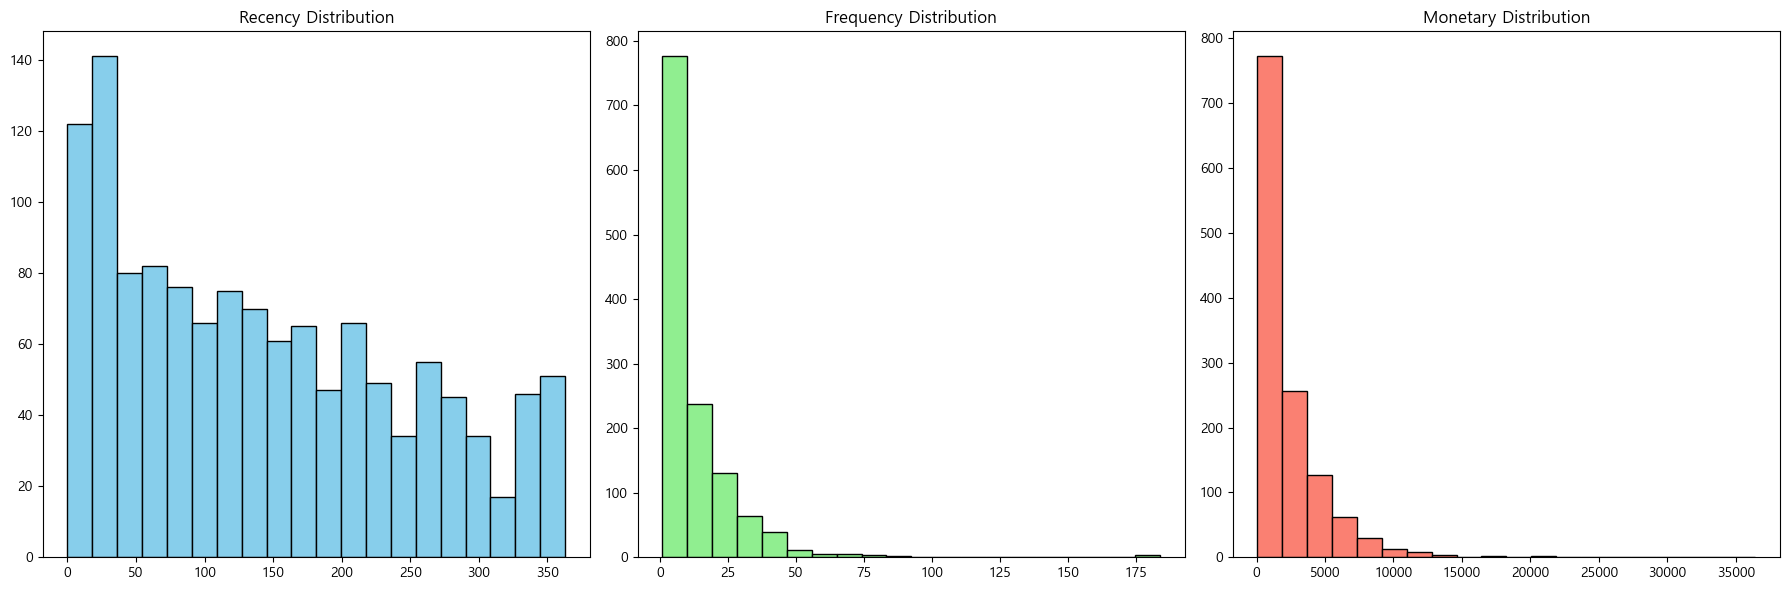

In [ ]:
# RFM 데이터 시각화
plt.figure(figsize=(18, 6))

# Recency 분포 시각화
plt.subplot(1, 3, 1)
plt.hist(RFM_Table['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
plt.hist(RFM_Table['Frequency'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
plt.hist(RFM_Table['Monetary'], bins=20, color='salmon', edgecolor='black')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

-----

### <RFM 계산>

In [ ]:
df2 = RFM_Table.copy()

In [ ]:
df2

,고객ID,Recency,Frequency,Monetary
0,USER_0001,59,22,4289.070
1,USER_0002,73,2,487.000
2,USER_0003,17,8,1095.742
3,USER_0004,107,6,931.890
4,USER_0005,130,1,155.000
...,...,...,...,...
1277,USER_1460,33,31,7052.800
1278,USER_1461,18,3,489.716
1279,USER_1464,142,6,1155.200
1280,USER_1466,69,1,304.000


#### Recency 기준
- 365일 기준으로 사분위수로 계산

In [ ]:
def recency(r):
    if r <= 365 * 0.2:
        return 5
    elif r <= 365 * 0.4:
        return 4
    elif r <= 365 * 0.6:
        return 3
    elif r <= 365 * 0.8:
        return 2
    else:
        return 1

# 개별 값에 대해 반복하기 때문에 map 함수
df2['R'] = df2['Recency'].map(lambda x: recency(x))
df2[['Recency', 'R']].head(3)

,Recency,R
0,59,5
1,73,5
2,17,5


#### Frequency 기준
- 빈도가 1이면 1등급
- 남은 등급에 대해 평균보다 작은 값에 등급 부여
- 반복

In [ ]:
def frequency(f):
    # 원본을 건드리지 않기 위해 새로 만듦
    s = pd.Series([0 for _ in range(len(f))])

    # 빈도가 1이면 1등급을 준다
    s[f == 1] = 1
    state = 2
    while state <= 4:
        # 아직 등급이 부여되지 않은 값들에 대해(값이 0), 평균보다 작은 값에 등급을 부여한다
        mean_value = f[s == 0].mean()  # 현재 등급이 부여되지 않은 값들의 평균 빈도 계산
        s[(s == 0) & (f < mean_value)] = state
        state += 1

    # 남은 것들은 5등급을 준다
    s[s==0] = 5

    # 등급별 기준 빈도를 출력
    print("1등급 기준 빈도:", f[f == 1].mean())
    print("2등급 기준 빈도:", f[s == 2].mean())
    print("3등급 기준 빈도:", f[s == 3].mean())
    print("4등급 기준 빈도:", f[s == 4].mean())

    return s

# 전체 값에 대해 접근하기 때문에 Series 전체를 함수에 넘김
df2['F'] = frequency(df2['Frequency'])
df2[['Frequency', 'F']].head(3)

1등급 기준 빈도: 1.0
2등급 기준 빈도: 6.422250316055626
3등급 기준 빈도: 20.919540229885058
4등급 기준 빈도: 38.33695652173913


,Frequency,F
0,22,3
1,2,2
2,8,2


#### Monetary 기준
- 상위 20%에게 4등급 부여
- 4등급의 최종결제금액 평균보다 높은 고객들에게 5등급 부여
- 하위 80% 고객들의 최종결제금액 평균보다 높은 고객들에게 3등급 부여
- 5,4,3등급을 제외한 고객들의 최종결제금액 평균보다 높은 고객들에게 2등급 부여
- 나머지에게 1등급 부여

In [ ]:
# 각 고객ID별 최종결제금액의 합 구하기
customer_total_amount = df.groupby('고객ID')['최종결제금액'].sum().reset_index()

# 최종결제금액에 따라 등급 부여
total_amount_sum = customer_total_amount['최종결제금액'].sum()
top_20_threshold = customer_total_amount['최종결제금액'].quantile(0.8)
grade_4_threshold = top_20_threshold
grade_5_threshold = customer_total_amount[customer_total_amount['최종결제금액'] > top_20_threshold]['최종결제금액'].mean()
grade_3_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_4_threshold]['최종결제금액'].mean()
grade_2_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_3_threshold]['최종결제금액'].mean()

# 등급 부여 함수 정의
def assign_grade(amount):
    if amount > grade_5_threshold:
        return 5
    elif amount > grade_4_threshold:
        return 4
    elif amount > grade_3_threshold:
        return 3
    elif amount > grade_2_threshold:
        return 2
    else:
        return 1

# 각 고객ID별 등급 부여
df2['M'] = df2['Monetary'].apply(assign_grade)
df2

,고객ID,Recency,Frequency,Monetary,R,F,M
0,USER_0001,59,22,4289.070,5,3,3
1,USER_0002,73,2,487.000,5,2,1
2,USER_0003,17,8,1095.742,5,2,2
3,USER_0004,107,6,931.890,4,2,2
4,USER_0005,130,1,155.000,4,1,1
...,...,...,...,...,...,...,...
1277,USER_1460,33,31,7052.800,5,4,4
1278,USER_1461,18,3,489.716,5,2,1
1279,USER_1464,142,6,1155.200,4,2,2
1280,USER_1466,69,1,304.000,5,1,1


In [ ]:
df2['Cell'] = df2['R'].map(str) + df2['F'].map(str) + df2['M'].map(str)
df2.head()

,고객ID,Recency,Frequency,Monetary,R,F,M,Cell
0,USER_0001,59,22,4289.070,5,3,3,533
1,USER_0002,73,2,487.000,5,2,1,521
2,USER_0003,17,8,1095.742,5,2,2,522
3,USER_0004,107,6,931.890,4,2,2,422
4,USER_0005,130,1,155.000,4,1,1,411


In [ ]:
df2.groupby(['R']).agg({'고객ID': 'count'})

,고객ID
R,
1,144
2,184
3,238
4,287
5,429


In [ ]:
df2.groupby(['F']).agg({'고객ID': 'count'})

,고객ID
F,
1,110
2,791
3,261
4,92
5,28


In [ ]:
df2['Monetary'] = df2['Monetary'].round(2)
df2.groupby(['M']).agg({'고객ID': 'count', 'Monetary': 'sum'})

,고객ID,Monetary
M,,
1,347,122032.30
2,360,401629.16
3,419,1217635.75
4,129,869782.93
5,27,466863.24


In [ ]:
df2.groupby('Cell')['Monetary'].sum()

Cell
111      3869.08
121     11426.06
122     50559.45
123     37237.56
133     85854.45
134     16221.35
144     34166.12
155     24467.47
211      2893.38
221     27339.93
222     60777.52
223     46264.91
233     61589.56
234     11801.64
244     29469.77
311      5526.25
321     25419.80
322     79368.71
323     65028.91
333    121264.48
334     10011.06
344     49839.94
411      3003.51
421     20169.33
422    104702.26
423     89287.29
433    205672.39
434     42567.56
443      4418.86
444    114432.35
445     11177.88
455     85460.30
511      4493.13
521     17891.83
522    106221.22
523    181932.98
533    319084.36
534    123685.13
544    398689.49
545     21483.96
554     38898.52
555    324273.63
Name: Monetary, dtype: float64

In [ ]:
# Cell 별 Monetary의 합계 계산
cell_monetary_sum = df2.groupby('Cell')['Monetary'].sum()

# 전체 Monetary의 합계 계산
total_monetary_sum = df2['Monetary'].sum()

# 비율 계산
cell_monetary_ratio = cell_monetary_sum / total_monetary_sum

# 결과 출력
cell_monetary_ratio

Cell
111    0.001257
121    0.003712
122    0.016426
123    0.012098
133    0.027893
134    0.005270
144    0.011100
155    0.007949
211    0.000940
221    0.008883
222    0.019746
223    0.015031
233    0.020010
234    0.003834
244    0.009575
311    0.001795
321    0.008259
322    0.025786
323    0.021127
333    0.039398
334    0.003253
344    0.016193
411    0.000976
421    0.006553
422    0.034017
423    0.029009
433    0.066821
434    0.013830
443    0.001436
444    0.037178
445    0.003632
455    0.027765
511    0.001460
521    0.005813
522    0.034510
523    0.059109
533    0.103668
534    0.040184
544    0.129531
545    0.006980
554    0.012638
555    0.105354
Name: Monetary, dtype: float64

In [ ]:
rf_matrix2 = df2.groupby(['R', 'F']).agg({
    '고객ID': 'count',
    'Monetary': 'sum'}).reset_index()
rf_matrix2['avg_sales'] = rf_matrix2['Monetary']/rf_matrix2['고객ID']
rf_matrix2['percentage_sales'] = (rf_matrix2['Monetary'] / rf_matrix2['Monetary'].sum())

- RF테이블 중 각각의 집합에 속한 고객의 수

In [ ]:
rf_pivot2 = rf_matrix2\
    .pivot(index='F', columns='R', values='고객ID')\
    .fillna(0)\
    .sort_index(ascending=False)

rf_pivot2\
    .style\
    .background_gradient(cmap ='Blues', axis=None, low=0.2)

R,1,2,3,4,5
F,,,,,
5,1.000000,0.000000,0.000000,5.000000,22.000000
4,5.000000,5.000000,7.000000,18.000000,57.000000
3,27.000000,20.000000,37.000000,66.000000,111.000000
2,91.000000,140.000000,162.000000,180.000000,218.000000
1,20.000000,19.000000,32.000000,18.000000,21.000000


- RF 테이블 중 각각의 집합의 최종결제금액의 평균금액

In [ ]:
rf_pivot2 = rf_matrix2\
    .pivot(index='F', columns='R', values='avg_sales')\
    .fillna(0)\
    .sort_index(ascending=False)

rf_pivot2\
    .style\
    .background_gradient(cmap ='Blues', axis=None, low=0.2)

R,1,2,3,4,5
F,,,,,
5,24467.470000,0.000000,0.000000,17092.060000,16507.825000
4,6833.224000,5893.954000,7119.991429,7223.838333,7371.464035
3,3780.585185,3669.560000,3547.987568,3761.211364,3988.914324
2,1090.363407,959.874000,1048.255679,1189.771556,1403.880872
1,193.454000,152.283158,172.695312,166.861667,213.958571


- RF 테이블 중 각각의 집합이 최종결제금액에서 차지하는 비율

In [ ]:
rf_pivot2 = rf_matrix2\
    .pivot(index='F', columns='R', values='percentage_sales')\
    .fillna(0)\
    .sort_index(ascending=False)

rf_pivot2\
    .style\
    .background_gradient(cmap ='Blues', axis=None, low=0.2)

R,1,2,3,4,5
F,,,,,
5,0.007949,0.000000,0.000000,0.027765,0.117992
4,0.011100,0.009575,0.016193,0.042245,0.136511
3,0.033164,0.023844,0.042650,0.080651,0.143852
2,0.032237,0.043660,0.055172,0.069579,0.099432
1,0.001257,0.000940,0.001795,0.000976,0.001460


In [ ]:
df2

,고객ID,Recency,Frequency,Monetary,R,F,M,Cell
0,USER_0001,59,22,4289.07,5,3,3,533
1,USER_0002,73,2,487.00,5,2,1,521
2,USER_0003,17,8,1095.74,5,2,2,522
3,USER_0004,107,6,931.89,4,2,2,422
4,USER_0005,130,1,155.00,4,1,1,411
...,...,...,...,...,...,...,...,...
1277,USER_1460,33,31,7052.80,5,4,4,544
1278,USER_1461,18,3,489.72,5,2,1,521
1279,USER_1464,142,6,1155.20,4,2,2,422
1280,USER_1466,69,1,304.00,5,1,1,511


----

#### <RFM 분석(값싼 카테고리)>

In [ ]:
rfm = df_low.copy()

In [ ]:
recency_data = rfm.groupby('고객ID')['거래날짜'].max().reset_index()
recency_data.head()

,고객ID,거래날짜
0,USER_0000,2019-09-15
1,USER_0001,2019-11-02
2,USER_0002,2019-10-19
3,USER_0003,2019-12-14
4,USER_0004,2019-09-15


In [ ]:
recency_data = rfm['거래날짜'].max()

In [ ]:
# Recency(최근성) 계산
recency_df = rfm.groupby('고객ID')['거래날짜'].max().reset_index()
recency_df['Recency'] = (recency_data - recency_df['거래날짜']).dt.days
recency_df

,고객ID,거래날짜,Recency
0,USER_0000,2019-09-15,107
1,USER_0001,2019-11-02,59
2,USER_0002,2019-10-19,73
3,USER_0003,2019-12-14,17
4,USER_0004,2019-09-15,107
...,...,...,...
1423,USER_1462,2019-07-05,179
1424,USER_1463,2019-04-05,270
1425,USER_1464,2019-10-05,87
1426,USER_1465,2019-06-20,194


In [ ]:
# Frequency(구매 빈도) 계산
frequency_df = rfm.groupby('고객ID')['거래ID'].count().reset_index()
frequency_df.rename(columns={'거래ID': 'Frequency'}, inplace=True)
frequency_df

,고객ID,Frequency
0,USER_0000,2
1,USER_0001,38
2,USER_0002,21
3,USER_0003,9
4,USER_0004,30
...,...,...
1423,USER_1462,4
1424,USER_1463,7
1425,USER_1464,34
1426,USER_1465,8


In [ ]:
# Monetary(구매 금액) 계산
monetary_df = rfm.groupby('고객ID')['최종결제금액'].sum().reset_index()
monetary_df.rename(columns={'최종결제금액': 'Monetary'}, inplace=True)
monetary_df

,고객ID,Monetary
0,USER_0000,171.693
1,USER_0001,9429.422
2,USER_0002,1021.565
3,USER_0003,239.991
4,USER_0004,941.322
...,...,...
1423,USER_1462,74.560
1424,USER_1463,811.480
1425,USER_1464,1609.958
1426,USER_1465,149.497


In [ ]:
RFM_Table = recency_df.merge(frequency_df, on='고객ID').merge(monetary_df, on='고객ID')
del RFM_Table['거래날짜']
RFM_Table.head()

,고객ID,Recency,Frequency,Monetary
0,USER_0000,107,2,171.693
1,USER_0001,59,38,9429.422
2,USER_0002,73,21,1021.565
3,USER_0003,17,9,239.991
4,USER_0004,107,30,941.322


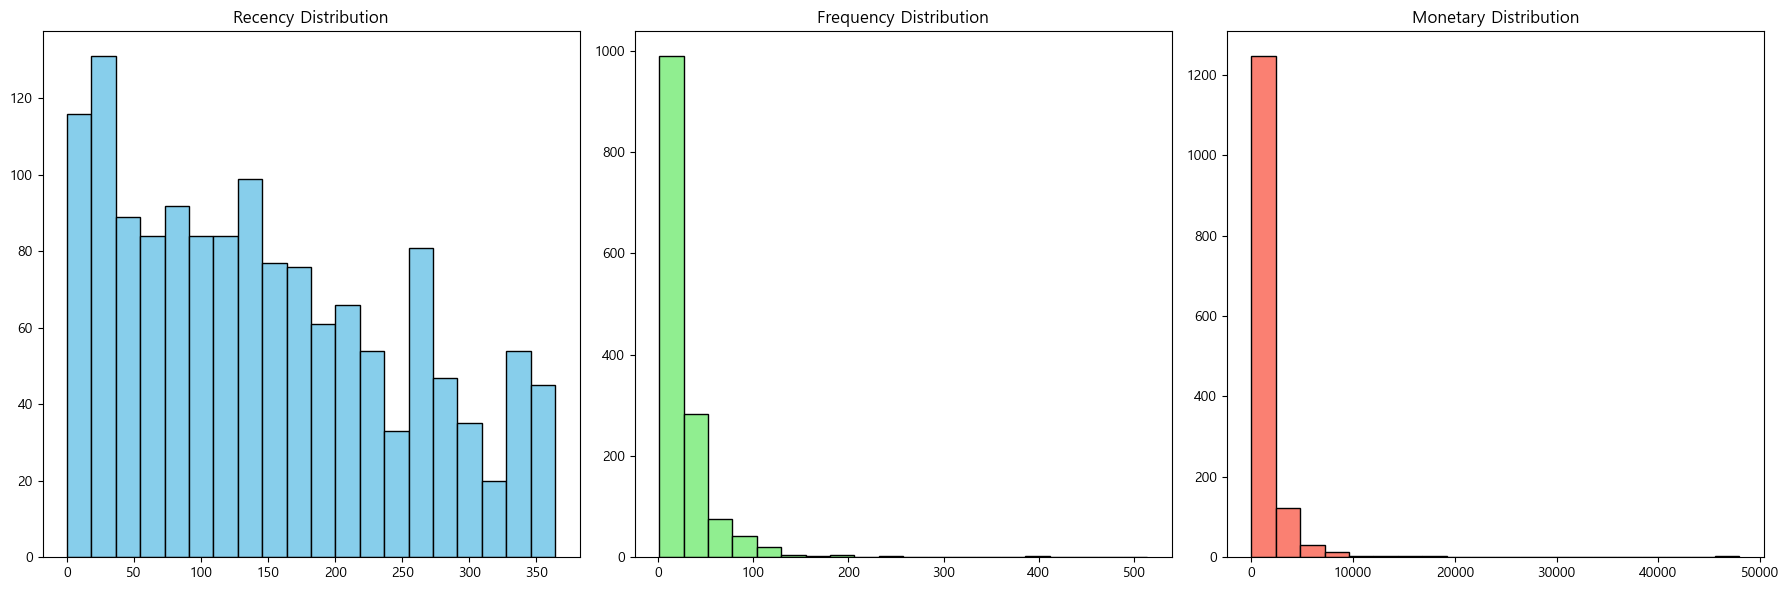

In [ ]:
# RFM 데이터 시각화
plt.figure(figsize=(18, 6))

# Recency 분포 시각화
plt.subplot(1, 3, 1)
plt.hist(RFM_Table['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
plt.hist(RFM_Table['Frequency'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
plt.hist(RFM_Table['Monetary'], bins=20, color='salmon', edgecolor='black')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

-----

### <RFM 계산>

In [ ]:
df2 = RFM_Table.copy()

In [ ]:
df2

,고객ID,Recency,Frequency,Monetary
0,USER_0000,107,2,171.693
1,USER_0001,59,38,9429.422
2,USER_0002,73,21,1021.565
3,USER_0003,17,9,239.991
4,USER_0004,107,30,941.322
...,...,...,...,...
1423,USER_1462,179,4,74.560
1424,USER_1463,270,7,811.480
1425,USER_1464,87,34,1609.958
1426,USER_1465,194,8,149.497


#### Recency 기준
- 365일 기준으로 사분위수로 계산

In [ ]:
def recency(r):
    if r <= 365 * 0.2:
        return 5
    elif r <= 365 * 0.4:
        return 4
    elif r <= 365 * 0.6:
        return 3
    elif r <= 365 * 0.8:
        return 2
    else:
        return 1

# 개별 값에 대해 반복하기 때문에 map 함수
df2['R'] = df2['Recency'].map(lambda x: recency(x))
df2[['Recency', 'R']].head(3)

,Recency,R
0,107,4
1,59,5
2,73,5


#### Frequency 기준
- 빈도가 1이면 1등급
- 남은 등급에 대해 평균보다 작은 값에 등급 부여
- 반복

In [ ]:
def frequency(f):
    # 원본을 건드리지 않기 위해 새로 만듦
    s = pd.Series([0 for _ in range(len(f))])

    # 빈도가 1이면 1등급을 준다
    s[f == 1] = 1
    state = 2
    while state <= 4:
        # 아직 등급이 부여되지 않은 값들에 대해(값이 0), 평균보다 작은 값에 등급을 부여한다
        mean_value = f[s == 0].mean()  # 현재 등급이 부여되지 않은 값들의 평균 빈도 계산
        s[(s == 0) & (f < mean_value)] = state
        state += 1

    # 남은 것들은 5등급을 준다
    s[s==0] = 5

    # 등급별 기준 빈도를 출력
    print("1등급 기준 빈도:", f[f == 1].mean())
    print("2등급 기준 빈도:", f[s == 2].mean())
    print("3등급 기준 빈도:", f[s == 3].mean())
    print("4등급 기준 빈도:", f[s == 4].mean())

    return s

# 전체 값에 대해 접근하기 때문에 Series 전체를 함수에 넘김
df2['F'] = frequency(df2['Frequency'])
df2[['Frequency', 'F']].head(3)

1등급 기준 빈도: 1.0
2등급 기준 빈도: 11.288716814159292
3등급 기준 빈도: 38.6525974025974
4등급 기준 빈도: 78.30208333333333


,Frequency,F
0,2,2
1,38,3
2,21,2


#### Monetary 기준
- 상위 20%에게 4등급 부여
- 4등급의 최종결제금액 평균보다 높은 고객들에게 5등급 부여
- 하위 80% 고객들의 최종결제금액 평균보다 높은 고객들에게 3등급 부여
- 5,4,3등급을 제외한 고객들의 최종결제금액 평균보다 높은 고객들에게 2등급 부여
- 나머지에게 1등급 부여

In [ ]:
# 각 고객ID별 최종결제금액의 합 구하기
customer_total_amount = df.groupby('고객ID')['최종결제금액'].sum().reset_index()

# 최종결제금액에 따라 등급 부여
total_amount_sum = customer_total_amount['최종결제금액'].sum()
top_20_threshold = customer_total_amount['최종결제금액'].quantile(0.8)
grade_4_threshold = top_20_threshold
grade_5_threshold = customer_total_amount[customer_total_amount['최종결제금액'] > top_20_threshold]['최종결제금액'].mean()
grade_3_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_4_threshold]['최종결제금액'].mean()
grade_2_threshold = customer_total_amount[customer_total_amount['최종결제금액'] <= grade_3_threshold]['최종결제금액'].mean()

# 등급 부여 함수 정의
def assign_grade(amount):
    if amount > grade_5_threshold:
        return 5
    elif amount > grade_4_threshold:
        return 4
    elif amount > grade_3_threshold:
        return 3
    elif amount > grade_2_threshold:
        return 2
    else:
        return 1

# 각 고객ID별 등급 부여
df2['M'] = df2['Monetary'].apply(assign_grade)
df2

,고객ID,Recency,Frequency,Monetary,R,F,M
0,USER_0000,107,2,171.693,4,2,1
1,USER_0001,59,38,9429.422,5,3,4
2,USER_0002,73,21,1021.565,5,2,2
3,USER_0003,17,9,239.991,5,2,1
4,USER_0004,107,30,941.322,4,3,2
...,...,...,...,...,...,...,...
1423,USER_1462,179,4,74.560,3,2,1
1424,USER_1463,270,7,811.480,2,2,2
1425,USER_1464,87,34,1609.958,4,3,2
1426,USER_1465,194,8,149.497,3,2,1


In [ ]:
df2['Cell'] = df2['R'].map(str) + df2['F'].map(str) + df2['M'].map(str)
df2.head()

,고객ID,Recency,Frequency,Monetary,R,F,M,Cell
0,USER_0000,107,2,171.693,4,2,1,421
1,USER_0001,59,38,9429.422,5,3,4,534
2,USER_0002,73,21,1021.565,5,2,2,522
3,USER_0003,17,9,239.991,5,2,1,521
4,USER_0004,107,30,941.322,4,3,2,432


In [ ]:
df2.groupby(['R']).agg({'고객ID': 'count'})

,고객ID
R,
1,152
2,214
3,279
4,358
5,425


In [ ]:
df2.groupby(['F']).agg({'고객ID': 'count'})

,고객ID
F,
1,85
2,904
3,308
4,96
5,35


In [ ]:
df2['Monetary'] = df2['Monetary'].round(2)
df2.groupby(['M']).agg({'고객ID': 'count', 'Monetary': 'sum'})

,고객ID,Monetary
M,,
1,788,205411.48
2,333,359763.07
3,247,657537.67
4,43,282114.86
5,17,333886.74


In [ ]:
df2.groupby('Cell')['Monetary'].sum()

Cell
111       986.14
121     20467.82
122     18544.01
123     15674.31
132      7696.42
         ...    
544     39916.41
545     42613.34
553      7863.98
554     60680.88
555    153101.35
Name: Monetary, Length: 67, dtype: float64

In [ ]:
# Cell 별 Monetary의 합계 계산
cell_monetary_sum = df2.groupby('Cell')['Monetary'].sum()

# 전체 Monetary의 합계 계산
total_monetary_sum = df2['Monetary'].sum()

# 비율 계산
cell_monetary_ratio = cell_monetary_sum / total_monetary_sum

# 결과 출력
cell_monetary_ratio

Cell
111    0.000536
121    0.011132
122    0.010085
123    0.008525
132    0.004186
         ...   
544    0.021709
545    0.023176
553    0.004277
554    0.033002
555    0.083265
Name: Monetary, Length: 67, dtype: float64

In [ ]:
rf_matrix2 = df2.groupby(['R', 'F']).agg({
    '고객ID': 'count',
    'Monetary': 'sum'}).reset_index()
rf_matrix2['avg_sales'] = rf_matrix2['Monetary']/rf_matrix2['고객ID']
rf_matrix2['percentage_sales'] = (rf_matrix2['Monetary'] / rf_matrix2['Monetary'].sum())

- RF테이블 중 각각의 집합에 속한 고객의 수

In [ ]:
rf_pivot2 = rf_matrix2\
    .pivot(index='F', columns='R', values='고객ID')\
    .fillna(0)\
    .sort_index(ascending=False)

rf_pivot2\
    .style\
    .background_gradient(cmap ='Blues', axis=None, low=0.2)

R,1,2,3,4,5
F,,,,,
5,1,2,6,8,18
4,6,5,16,29,40
3,25,40,52,89,102
2,104,146,188,215,251
1,16,21,17,17,14


- RF 테이블 중 각각의 집합의 최종결제금액의 평균금액

In [ ]:
rf_pivot2 = rf_matrix2\
    .pivot(index='F', columns='R', values='avg_sales')\
    .fillna(0)\
    .sort_index(ascending=False)

rf_pivot2\
    .style\
    .background_gradient(cmap ='Blues', axis=None, low=0.2)

R,1,2,3,4,5
F,,,,,
5,12216.150000,8635.365000,5557.373333,12466.443750,12313.678333
4,3995.876667,3797.080000,3258.693750,3339.822759,4456.313500
3,2811.217200,1991.459750,1745.466731,1851.995169,1920.556961
2,525.828269,578.776096,498.680372,506.381628,545.374542
1,61.633750,82.236190,28.608824,30.134706,32.725000


- RF 테이블 중 각각의 집합이 최종결제금액에서 차지하는 비율

In [ ]:
rf_pivot2 = rf_matrix2\
    .pivot(index='F', columns='R', values='percentage_sales')\
    .fillna(0)\
    .sort_index(ascending=False)

rf_pivot2\
    .style\
    .background_gradient(cmap ='Blues', axis=None, low=0.2)

R,1,2,3,4,5
F,,,,,
5,0.006644,0.009393,0.018135,0.054240,0.120544
4,0.013039,0.010325,0.028356,0.052675,0.096944
3,0.038223,0.043323,0.049363,0.089643,0.106540
2,0.029742,0.045957,0.050988,0.059211,0.074448
1,0.000536,0.000939,0.000265,0.000279,0.000249


In [ ]:
df2

,고객ID,Recency,Frequency,Monetary,R,F,M,Cell
0,USER_0000,107,2,171.69,4,2,1,421
1,USER_0001,59,38,9429.42,5,3,4,534
2,USER_0002,73,21,1021.56,5,2,2,522
3,USER_0003,17,9,239.99,5,2,1,521
4,USER_0004,107,30,941.32,4,3,2,432
...,...,...,...,...,...,...,...,...
1423,USER_1462,179,4,74.56,3,2,1,321
1424,USER_1463,270,7,811.48,2,2,2,222
1425,USER_1464,87,34,1609.96,4,3,2,432
1426,USER_1465,194,8,149.50,3,2,1,321


----

### <머신러닝>

In [ ]:
df.head()

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액,월,쿠폰코드,할인율,GST,최종결제금액
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0,0.10,144.839
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0,0.10,144.839
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05,Jan,OFF10,10.0,0.10,8.345
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65,Jan,SALE10,10.0,0.18,94.150
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,16.50,Jan,AIO10,10.0,0.18,21.350


In [ ]:
# '카테고리 등급'이라는 새로운 컬럼을 만들고 초기값으로 'low'를 설정합니다
df['카테고리등급'] = 'low'

# '제품카테고리'가 'Backpacks', 'Gift Cards', 'Nest', 'Nest-Canada', 'Nest-USA'에 해당하는 행은 'high'로 설정합니다
df.loc[df['제품카테고리'].isin(['Backpacks', 'Gift Cards', 'Nest', 'Nest-Canada', 'Nest-USA']), '카테고리등급'] = 'high'

In [ ]:
df.head()

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액,월,쿠폰코드,할인율,GST,최종결제금액,카테고리등급
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0,0.10,144.839,high
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,Jan,ELEC10,10.0,0.10,144.839,high
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05,Jan,OFF10,10.0,0.10,8.345,low
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65,Jan,SALE10,10.0,0.18,94.150,low
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,16.50,Jan,AIO10,10.0,0.18,21.350,low


In [ ]:
rfm = df.copy()

In [ ]:
recency_data = rfm.groupby('고객ID')['거래날짜'].max().reset_index()
recency_data.head()

,고객ID,거래날짜
0,USER_0000,2019-09-15
1,USER_0001,2019-11-02
2,USER_0002,2019-10-19
3,USER_0003,2019-12-14
4,USER_0004,2019-09-15


In [ ]:
recency_data = rfm['거래날짜'].max()

In [ ]:
# Recency(최근성) 계산
recency_df = rfm.groupby('고객ID')['거래날짜'].max().reset_index()
recency_df['Recency'] = (recency_data - recency_df['거래날짜']).dt.days
recency_df

,고객ID,거래날짜,Recency
0,USER_0000,2019-09-15,107
1,USER_0001,2019-11-02,59
2,USER_0002,2019-10-19,73
3,USER_0003,2019-12-14,17
4,USER_0004,2019-09-15,107
...,...,...,...
1463,USER_1463,2019-04-05,270
1464,USER_1464,2019-10-05,87
1465,USER_1465,2019-06-20,194
1466,USER_1466,2019-10-23,69


In [ ]:
# Frequency(구매 빈도) 계산
frequency_df = rfm.groupby('고객ID')['거래ID'].count().reset_index()
frequency_df.rename(columns={'거래ID': 'Frequency'}, inplace=True)
frequency_df

,고객ID,Frequency
0,USER_0000,2
1,USER_0001,60
2,USER_0002,23
3,USER_0003,17
4,USER_0004,36
...,...,...
1463,USER_1463,7
1464,USER_1464,40
1465,USER_1465,8
1466,USER_1466,1


In [ ]:
RFM_Table = recency_df.merge(frequency_df, on='고객ID')
del RFM_Table['거래날짜']
RFM_Table.head()

,고객ID,Recency,Frequency
0,USER_0000,107,2
1,USER_0001,59,60
2,USER_0002,73,23
3,USER_0003,17,17
4,USER_0004,107,36


In [ ]:
df2 = RFM_Table.copy()

In [ ]:
def recency(r):
    if r <= 365 * 0.2:
        return 5
    elif r <= 365 * 0.4:
        return 4
    elif r <= 365 * 0.6:
        return 3
    elif r <= 365 * 0.8:
        return 2
    else:
        return 1

# 개별 값에 대해 반복하기 때문에 map 함수
df2['R'] = df2['Recency'].map(lambda x: recency(x))
df2[['Recency', 'R']].head(3)

,Recency,R
0,107,4
1,59,5
2,73,5


In [ ]:
def frequency(f):
    # 원본을 건드리지 않기 위해 새로 만듦
    s = pd.Series([0 for _ in range(len(f))])

    # 빈도가 1이면 1등급을 준다
    s[f == 1] = 1
    state = 2
    while state <= 4:
        # 아직 등급이 부여되지 않은 값들에 대해(값이 0), 평균보다 작은 값에 등급을 부여한다
        mean_value = f[s == 0].mean()  # 현재 등급이 부여되지 않은 값들의 평균 빈도 계산
        s[(s == 0) & (f < mean_value)] = state
        state += 1

    # 남은 것들은 5등급을 준다
    s[s==0] = 5

    # 등급별 기준 빈도를 출력
    print("1등급 기준 빈도:", f[f == 1].mean())
    print("2등급 기준 빈도:", f[s == 2].mean())
    print("3등급 기준 빈도:", f[s == 3].mean())
    print("4등급 기준 빈도:", f[s == 4].mean())

    return s

# 전체 값에 대해 접근하기 때문에 Series 전체를 함수에 넘김
df2['F'] = frequency(df2['Frequency'])
df2[['Frequency', 'F']].head(3)

1등급 기준 빈도: 1.0
2등급 기준 빈도: 15.820594479830149
3등급 기준 빈도: 55.126543209876544
4등급 기준 빈도: 108.86274509803921


,Frequency,F
0,2,2
1,60,3
2,23,2


In [ ]:
df2

,고객ID,Recency,Frequency,R,F
0,USER_0000,107,2,4,2
1,USER_0001,59,60,5,3
2,USER_0002,73,23,5,2
3,USER_0003,17,17,5,2
4,USER_0004,107,36,4,2
...,...,...,...,...,...
1463,USER_1463,270,7,2,2
1464,USER_1464,87,40,4,3
1465,USER_1465,194,8,3,2
1466,USER_1466,69,1,5,1


In [ ]:
merged_table = pd.merge(rfm, df2, on='고객ID', how='inner')

In [ ]:
merged_table['고객등급'] = 'non vip'

In [ ]:
merged_table

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,쿠폰코드,할인율,GST,최종결제금액,카테고리등급,Recency,Frequency,R,F,고객등급
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,...,ELEC10,10.0,0.10,144.839,high,339,297,1,5,non vip
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,...,ELEC10,10.0,0.10,144.839,high,339,297,1,5,non vip
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,...,OFF10,10.0,0.10,8.345,low,339,297,1,5,non vip
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,...,SALE10,10.0,0.18,94.150,low,339,297,1,5,non vip
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,...,AIO10,10.0,0.18,21.350,low,339,297,1,5,non vip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,여,New York,45,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,...,ELEC30,30.0,0.10,127.800,high,0,8,5,2,non vip
52920,USER_0504,여,New York,45,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,...,SALE30,30.0,0.18,40.744,low,0,8,5,2,non vip
52921,USER_0504,여,New York,45,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,...,ELEC30,30.0,0.10,112.816,high,0,8,5,2,non vip
52922,USER_0562,여,California,7,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,...,ELEC30,30.0,0.10,409.100,high,0,2,5,2,non vip


- vip(비쌈) / (5,5), (5,4), (5,3)

In [ ]:
vip_criteria = (merged_table['카테고리등급'] == 'high') & (merged_table['R'] == 5) & (merged_table['F'].isin([5, 4, 3]))

merged_table.loc[vip_criteria, '고객등급'] = 'vip'

- 잠재적 vip(비쌈) / (3,2), (4,2), (4,3), (5,2)

In [ ]:
pre_vip_criteria = ((merged_table['카테고리등급'] == 'high') &
                    ((merged_table['R'] == 3) & (merged_table['F'] == 2) |
                     (merged_table['R'] == 4) & (merged_table['F'].isin([2, 3])) |
                     (merged_table['R'] == 5) & (merged_table['F'] == 2)))

merged_table.loc[pre_vip_criteria, '고객등급'] = 'pre vip'

- vip(값쌈) / (5,5), (5,3)

In [ ]:
vip_criteria = (merged_table['카테고리등급'] == 'low') & (merged_table['R'] == 5) & (merged_table['F'].isin([5, 3]))

merged_table.loc[vip_criteria, '고객등급'] = 'vip'

- 잠재적 vip(값쌈) / (5,4), (5,2), (4,5), (4,4), (4,3), (4,2), (3,2)

In [ ]:
pre_vip_criteria = ((merged_table['카테고리등급'] == 'low') &
                    ((merged_table['R'] == 3) & (merged_table['F'] == 2) |
                     (merged_table['R'] == 4) & (merged_table['F'].isin([2, 3, 4, 5])) |
                     (merged_table['R'] == 5) & (merged_table['F'].isin([2, 4]))))

merged_table.loc[pre_vip_criteria, '고객등급'] = 'pre vip'

In [ ]:
merged_table

,고객ID,성별,고객지역,가입기간,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,...,쿠폰코드,할인율,GST,최종결제금액,카테고리등급,Recency,Frequency,R,F,고객등급
0,USER_1358,남,Chicago,12,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,...,ELEC10,10.0,0.10,144.839,high,339,297,1,5,non vip
1,USER_1358,남,Chicago,12,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,...,ELEC10,10.0,0.10,144.839,high,339,297,1,5,non vip
2,USER_1358,남,Chicago,12,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,...,OFF10,10.0,0.10,8.345,low,339,297,1,5,non vip
3,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,...,SALE10,10.0,0.18,94.150,low,339,297,1,5,non vip
4,USER_1358,남,Chicago,12,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,...,AIO10,10.0,0.18,21.350,low,339,297,1,5,non vip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,여,New York,45,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,...,ELEC30,30.0,0.10,127.800,high,0,8,5,2,pre vip
52920,USER_0504,여,New York,45,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,...,SALE30,30.0,0.18,40.744,low,0,8,5,2,pre vip
52921,USER_0504,여,New York,45,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,...,ELEC30,30.0,0.10,112.816,high,0,8,5,2,pre vip
52922,USER_0562,여,California,7,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,...,ELEC30,30.0,0.10,409.100,high,0,2,5,2,pre vip


### Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Features와 Labels를 나누기
X = merged_table[['Recency', 'Frequency', 'R', 'F']]
y = merged_table['고객등급']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다항 나이브 베이즈 모델 생성 및 학습
model = MultinomialNB()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5981105337742088


In [ ]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# classification_report를 사용하여 클래스별 정확도 출력
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     non vip       0.56      0.78      0.65      3013
     pre vip       0.56      0.43      0.49      4603
         vip       0.69      0.68      0.68      2969

    accuracy                           0.60     10585
   macro avg       0.61      0.63      0.61     10585
weighted avg       0.60      0.60      0.59     10585



### knn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Features와 Labels를 나누기
X = merged_table[['Recency', 'Frequency', 'R', 'F']]
y = merged_table['고객등급']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 분류 모델 생성 및 학습
model = KNeighborsClassifier(n_neighbors=5)  # 이웃의 개수는 5로 설정
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9215871516296646


In [ ]:
from sklearn.model_selection import GridSearchCV

# 탐색할 이웃의 개수 범위 지정
param_grid = {'n_neighbors': range(1, 21)}  # 1부터 20까지의 이웃 수를 탐색

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV를 사용하여 최적의 이웃 수 탐색
grid_search = GridSearchCV(knn, param_grid, cv=5)  # 5-폴드 교차 검증을 사용
grid_search.fit(X_train, y_train)

# 최적의 이웃 수 출력
print("Best Number of Neighbors:", grid_search.best_params_['n_neighbors'])

# 최적의 이웃 수로 모델 생성 및 학습
best_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
best_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = best_model.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best Number of Neighbors: 14


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9287671232876712


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

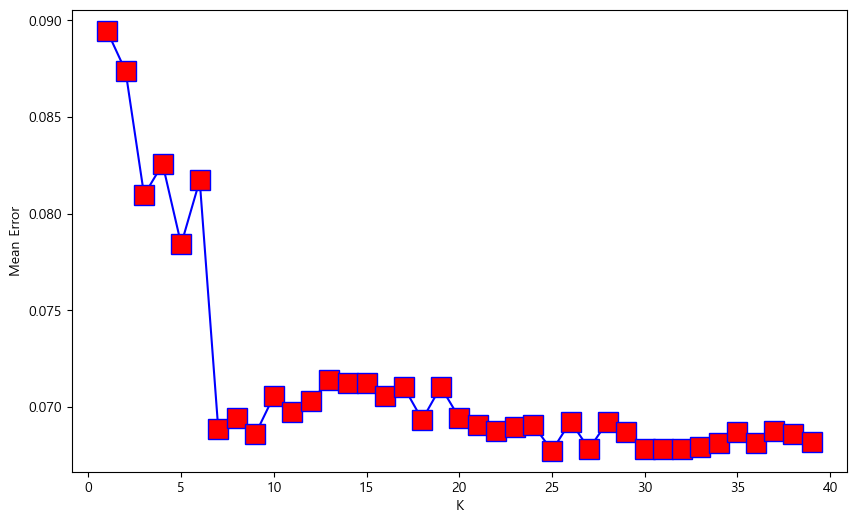

In [ ]:
import matplotlib.pyplot as plt

error = []

# k값 1-40까지 반복 실행, 평균 오류를 계산해서 error목록에 출력
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

# x축: K값, y축: 평균 오류인 k값에 대한 오류비율표 작성
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error, color = 'blue', marker='s', markerfacecolor='red',markersize=15)
plt.xlabel('K')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# 탐색할 이웃의 개수 범위 지정
param_grid = {'n_neighbors': range(1, 41)}  # 1부터 20까지의 이웃 수를 탐색

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV를 사용하여 최적의 이웃 수 탐색
grid_search = GridSearchCV(knn, param_grid, cv=5)  # 5-폴드 교차 검증을 사용
grid_search.fit(X_train, y_train)

# 최적의 이웃 수 출력
print("Best Number of Neighbors:", grid_search.best_params_['n_neighbors'])

# 최적의 이웃 수로 모델 생성 및 학습
best_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
best_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = best_model.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best Number of Neighbors: 37


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9312234293811998


In [ ]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# classification_report를 사용하여 클래스별 정확도 출력
report = classification_report(y_test, y_pred)
print(report)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

     non vip       0.95      0.92      0.93      3013
     pre vip       0.89      0.94      0.91      4603
         vip       0.95      0.91      0.93      2969

    accuracy                           0.92     10585
   macro avg       0.93      0.92      0.92     10585
weighted avg       0.92      0.92      0.92     10585



### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Features와 Labels를 나누기
X = merged_table[['Recency', 'Frequency', 'R', 'F']]
y = merged_table['고객등급']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 생성 및 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9327350023618328


In [ ]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# classification_report를 사용하여 클래스별 정확도 출력
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     non vip       1.00      0.90      0.95      3013
     pre vip       0.87      0.99      0.93      4603
         vip       0.98      0.88      0.93      2969

    accuracy                           0.93     10585
   macro avg       0.95      0.92      0.93     10585
weighted avg       0.94      0.93      0.93     10585



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 불러오기
data = merged_table

# 데이터 전처리
# 필요한 특성 선택
features = ['가입기간', '평균금액', '수량', '배송료', 'GST', '최종결제금액', 'Recency', 'Frequency', 'R', 'F']

# 입력 변수(X) 및 출력 변수(y) 설정
X = data[features]
y = data['고객등급']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Decision Tree 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9997480791031617
Classification Report:
               precision    recall  f1-score   support

     non vip       1.00      1.00      1.00      4475
     pre vip       1.00      1.00      1.00      7046
         vip       1.00      1.00      1.00      4357

    accuracy                           1.00     15878
   macro avg       1.00      1.00      1.00     15878
weighted avg       1.00      1.00      1.00     15878



### Nueral Net

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Features와 Labels를 나누기
X = merged_table[['Recency', 'Frequency', 'R', 'F']]
y = merged_table['고객등급']

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Neural Network 모델 생성 및 학습
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9324515824279641


In [ ]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# classification_report를 사용하여 클래스별 정확도 출력
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     non vip       1.00      0.90      0.95      3013
     pre vip       0.87      1.00      0.93      4603
         vip       1.00      0.86      0.93      2969

    accuracy                           0.93     10585
   macro avg       0.96      0.92      0.93     10585
weighted avg       0.94      0.93      0.93     10585



In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# 데이터 불러오기
data = merged_table

# 데이터 전처리
# 입력 특성과 출력 변수 설정
X = data[['가입기간', '평균금액', '수량', '배송료', 'GST', '최종결제금액', 'Recency', 'Frequency', 'R', 'F']]
y = data['고객등급']

# 범주형 출력 변수를 숫자로 변환
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=42)

# 입력 변수를 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 출력 변수를 One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Neural Network 모델 생성
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 출력 노드 수는 클래스 수와 동일해야 함

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# 모델 평가
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

# 테스트 데이터에 대한 예측
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
report = classification_report(np.argmax(y_test, axis=1), y_pred)
print("Classification Report:\n", report)

Epoch 1/50
1324/1324 [==============================] - 3s 2ms/step - loss: 0.1548 - accuracy: 0.9523
Epoch 2/50
1324/1324 [==============================] - 2s 2ms/step - loss: 0.0215 - accuracy: 0.9970
Epoch 3/50
1324/1324 [==============================] - 2s 1ms/step - loss: 0.0143 - accuracy: 0.9974
Epoch 4/50
1324/1324 [==============================] - 2s 2ms/step - loss: 0.0093 - accuracy: 0.9981
Epoch 5/50
1324/1324 [==============================] - 2s 1ms/step - loss: 0.0082 - accuracy: 0.9980
Epoch 6/50
1324/1324 [==============================] - 2s 2ms/step - loss: 0.0054 - accuracy: 0.9987
Epoch 7/50
1324/1324 [==============================] - 2s 2ms/step - loss: 0.0044 - accuracy: 0.9989
Epoch 8/50
1324/1324 [==============================] - 2s 1ms/step - loss: 0.0042 - accuracy: 0.9990
Epoch 9/50
1324/1324 [==============================] - 2s 2ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 10/50
1324/1324 [==============================] - 2s 2ms/step - loss: 0.003

### Randomforest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Features와 Labels를 나누기
X = merged_table[['Recency', 'Frequency', 'R', 'F']]
y = merged_table['고객등급']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9327350023618328


In [ ]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# classification_report를 사용하여 클래스별 정확도 출력
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     non vip       1.00      0.90      0.95      3013
     pre vip       0.87      0.99      0.93      4603
         vip       0.98      0.88      0.93      2969

    accuracy                           0.93     10585
   macro avg       0.95      0.92      0.93     10585
weighted avg       0.94      0.93      0.93     10585



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 불러오기
data = merged_table

# 데이터 전처리
# 필요한 특성 선택
features = ['가입기간', '평균금액', '수량', '배송료', 'GST', '최종결제금액', 'Recency', 'Frequency', 'R', 'F']

# 입력 변수(X) 및 출력 변수(y) 설정
X = data[features]
y = data['고객등급']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9996221067548418
Classification Report:
               precision    recall  f1-score   support

     non vip       1.00      1.00      1.00      3013
     pre vip       1.00      1.00      1.00      4603
         vip       1.00      1.00      1.00      2969

    accuracy                           1.00     10585
   macro avg       1.00      1.00      1.00     10585
weighted avg       1.00      1.00      1.00     10585



### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Features와 Labels를 나누기
X = merged_table[['Recency', 'Frequency', 'R', 'F']]
y = merged_table['고객등급']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression 모델 생성 및 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8655644780349552


In [ ]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# classification_report를 사용하여 클래스별 정확도 출력
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     non vip       0.94      0.92      0.93      3013
     pre vip       0.87      0.82      0.84      4603
         vip       0.80      0.89      0.84      2969

    accuracy                           0.87     10585
   macro avg       0.87      0.87      0.87     10585
weighted avg       0.87      0.87      0.87     10585



In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 데이터 불러오기
data = merged_table

# 데이터 전처리
# 입력 특성과 출력 변수 설정
X = data[['가입기간', '평균금액', '수량', '배송료', 'GST', '최종결제금액', 'Recency', 'Frequency', 'R', 'F']]
y = data['고객등급']

# 원-핫 인코딩을 사용하여 범주형 변수를 이진 변수로 변환
X = pd.get_dummies(X)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8386395843174304
Classification Report:
               precision    recall  f1-score   support

     non vip       0.93      0.95      0.94      3013
     pre vip       0.82      0.81      0.81      4603
         vip       0.78      0.77      0.77      2969

    accuracy                           0.84     10585
   macro avg       0.84      0.84      0.84     10585
weighted avg       0.84      0.84      0.84     10585



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### XGBoost (Extreme Gradient Boosting)

In [ ]:
pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 클래스 레이블을 정수로 변환
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Features와 Labels를 나누기
X = merged_table[['Recency', 'Frequency', 'R', 'F']]
y = merged_table['고객등급']

# 클래스 레이블을 정수로 변환
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9327350023618328


In [ ]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# classification_report를 사용하여 클래스별 정확도 출력
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3013
           1       0.87      0.99      0.93      4603
           2       0.98      0.88      0.93      2969

    accuracy                           0.93     10585
   macro avg       0.95      0.92      0.93     10585
weighted avg       0.94      0.93      0.93     10585



In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# 데이터 불러오기
data = merged_table

# 데이터 전처리
# 입력 특성과 출력 변수 설정
X = data[['가입기간', '평균금액', '수량', '배송료', 'GST', '최종결제금액', 'Recency', 'Frequency', 'R', 'F']]
y = data['고객등급']

# 고객등급을 숫자로 변환(0:non vip, 1: pre vip, 2: vip)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9995276334435522
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3013
           1       1.00      1.00      1.00      4603
           2       1.00      1.00      1.00      2969

    accuracy                           1.00     10585
   macro avg       1.00      1.00      1.00     10585
weighted avg       1.00      1.00      1.00     10585



### LightGBM

In [ ]:
pip install lightgbm


     ---------------------------------------- 1.3/1.3 MB 3.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Features와 Labels를 나누기
X = merged_table[['Recency', 'Frequency', 'R', 'F']]
y = merged_table['고객등급']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 생성 및 학습
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 42339, number of used features: 4
[LightGBM] [Info] Start training from score -1.250439
[LightGBM] [Info] Start training from score -0.819594
[LightGBM] [Info] Start training from score -1.298244
Accuracy: 0.9329239489844119


In [ ]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# classification_report를 사용하여 클래스별 정확도 출력
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     non vip       1.00      0.90      0.95      3013
     pre vip       0.87      0.99      0.93      4603
         vip       0.98      0.88      0.93      2969

    accuracy                           0.93     10585
   macro avg       0.95      0.92      0.93     10585
weighted avg       0.94      0.93      0.93     10585



In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# 데이터 불러오기
data = merged_table

# 데이터 전처리
# 입력 특성과 출력 변수 설정
X = data[['가입기간', '평균금액', '수량', '배송료', 'GST', '최종결제금액', 'Recency', 'Frequency', 'R', 'F']]
y = data['고객등급']

# 고객등급을 숫자로 변환(0:non vip, 1: pre vip, 2: vip)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 생성 및 학습
model = lgb.LGBMClassifier(objective='multiclass', num_class=3, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 42339, number of used features: 10
[LightGBM] [Info] Start training from score -1.250439
[LightGBM] [Info] Start training from score -0.819594
[LightGBM] [Info] Start training from score -1.298244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.9996221067548418
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3013
           1       1.00      1.00      1.00      4603
           2       1.00      1.00      1.00      2969

    accuracy                           1.00     10585
   macro avg       1.00      1.00      1.00     10585
weighted avg       1.00      1.

- Naive Bayes / Accuracy: 0.5981105337742088
- knn(n=37) / Accuracy: 0.9312234293811998
- Decision Tree / Accuracy: 0.9327350023618328 / Accuracy: 0.9997480791031617
- Nueral Net / Accuracy: 0.9324515824279641 / Accuracy: 0.9977326393127441
- Randomforest / Accuracy: 0.9327350023618328 / Accuracy: 0.9996221067548418
- Logistic Regression / Accuracy: 0.8655644780349552 / Accuracy: 0.8386395843174304
- XGBoost (Extreme Gradient Boosting) / Accuracy: 0.9327350023618328 / Accuracy: 0.9995276334435522
- LightGBM / Accuracy: 0.9329239489844119 / Accuracy: 0.9996221067548418